## Prova para Monitoria - Ciência de dados (ENG437) do semestre 2023.1


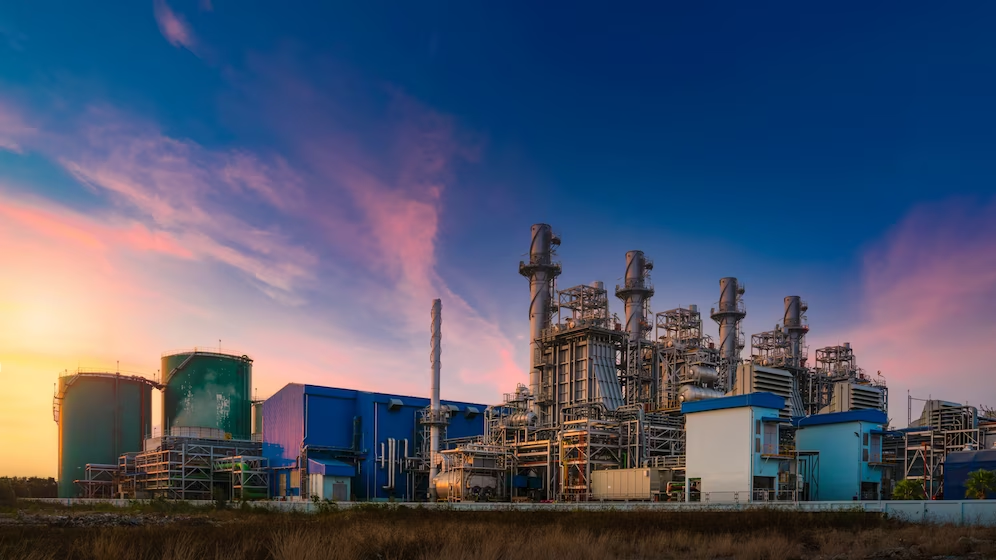


Uma Usina de ciclo combinado (UCC) é composta por turbinas a Gás, turbinas a vapor e geradores com recuperação de calor. Em uma UCC a eletricidade gerada por turbinas gás e a vapor são combinadas em um ciclo, e a eletricidade gerada é transferida de uma turbina para a outra. Prever a saída de energia gerada por essas usinas é muito importante para maximizar o lucro dos Megawatts- hora disponíveis. A operação de uma usina do tipo UCC e a produção de energia elétrica nesse tipo de usina é influenciada por 4 parâmetros principais: Temperatura ambiente , Pressão Atmosférica, Umidade relativa e Pressão do vapor de exaustão.
As amostras que compõem o conjunto de dados utilizado nessa aplicação foram coletados ao longo de 6 anos (2006 - 2011) da operação de uma usina de ciclo combinado. 

Cada valor das variáveis contida no banco de dados é a média por hora:
- Temperatura ambiente - range: 1.81°C - 37.11°C
- Pressão ambiente - range: 992.89 - 1033.30 milibar
- Umidade relativa - range: 25.56% - 100.16%
- Vácuo de exaustão - range: 25.36 - 81.56 cmHg
- Produção de energia elétrica por hora - range: 420.26 - 495.76 MW

Com os dados disponíveis de uma UCC real o desafio é:
- Realizar uma **análise exploratória dos dados** com a criação de gráficos a fim de verificar o comportamento das variáveis do sistema e investigar a correlação entre as variáveis;
- Aplicar **pelo menos dois tipos** de modelos baseados em técnicas de aprendizagem de máquina diferentes e avaliar os seus desempenhos utilizando as métricas adequadas.

Após a realização da avaliação, faça o download do notebook no formato .ipynb e envie para os e- mails: yagomsv@hotmail.com/ karlaesquerre@ufba.br.

Prazo para envio do notebook:  **23:59 horas de hoje (21/03/2023)**.




**Boa sorte!**


#Manipulação do DataFrame

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = '/content/Dataset.csv'
df = pd.read_csv (url)

df.head()

,,,,,Temperatura Ambiente (°C);Vácuo de Exaustão (cm Hg);Pressão atmosférica (milibar);Umidade relativa;Produção de energia elétrica por hora (MW);;
8,34;40,77;1010,84;90,01;480,48;;
23,64;58,49;1011,4;74,2;445,75;;
29,74;56,9;1007,15;41,91;438,76;;
19,07;49,69;1007,22;76,79;453,09;;
11,8;40,66;1017,13;97,2;464,43;;


In [55]:
df = df.reset_index()

In [56]:
df

,level_0,level_1,level_2,level_3,level_4,Temperatura Ambiente (°C);Vácuo de Exaustão (cm Hg);Pressão atmosférica (milibar);Umidade relativa;Produção de energia elétrica por hora (MW);;
0,8,34;40,77;1010,84;90,01;480,48;;
1,23,64;58,49;1011,4;74,2;445,75;;
2,29,74;56,9;1007,15;41,91;438,76;;
3,19,07;49,69;1007,22;76,79;453,09;;
4,11,8;40,66;1017,13;97,2;464,43;;
...,...,...,...,...,...,...
9563,15,12;48,92;1011,8;72,93;462,59;;
9564,33,41;77,95;1010,3;59,72;432,9;;
9565,15,99;43,34;1014,2;78,66;465,96;;
9566,17,65;59,87;1018,58;94,65;450,93;;


In [57]:
separar = lambda x : (x).str.split(';', n = -1, expand = False)
df = df.apply(separar)
df

,level_0,level_1,level_2,level_3,level_4,Temperatura Ambiente (°C);Vácuo de Exaustão (cm Hg);Pressão atmosférica (milibar);Umidade relativa;Produção de energia elétrica por hora (MW);;
0,[8],"[34, 40]","[77, 1010]","[84, 90]","[01, 480]","[48, , ]"
1,[23],"[64, 58]","[49, 1011]","[4, 74]","[2, 445]","[75, , ]"
2,[29],"[74, 56]","[9, 1007]","[15, 41]","[91, 438]","[76, , ]"
3,[19],"[07, 49]","[69, 1007]","[22, 76]","[79, 453]","[09, , ]"
4,[11],"[8, 40]","[66, 1017]","[13, 97]","[2, 464]","[43, , ]"
...,...,...,...,...,...,...
9563,[15],"[12, 48]","[92, 1011]","[8, 72]","[93, 462]","[59, , ]"
9564,[33],"[41, 77]","[95, 1010]","[3, 59]","[72, 432]","[9, , ]"
9565,[15],"[99, 43]","[34, 1014]","[2, 78]","[66, 465]","[96, , ]"
9566,[17],"[65, 59]","[87, 1018]","[58, 94]","[65, 450]","[93, , ]"


In [58]:
df  = df.rename(columns = {'level_0': '1',
                          'level_1': '2',
                          'level_2': '3',
                          'level_3': '4',
                          'level_4': '5',
                          'Temperatura Ambiente (°C);Vácuo de Exaustão (cm Hg);Pressão atmosférica (milibar);Umidade relativa;Produção de energia elétrica por hora (MW);;' : '6'
                          })
df

,1,2,3,4,5,6
0,[8],"[34, 40]","[77, 1010]","[84, 90]","[01, 480]","[48, , ]"
1,[23],"[64, 58]","[49, 1011]","[4, 74]","[2, 445]","[75, , ]"
2,[29],"[74, 56]","[9, 1007]","[15, 41]","[91, 438]","[76, , ]"
3,[19],"[07, 49]","[69, 1007]","[22, 76]","[79, 453]","[09, , ]"
4,[11],"[8, 40]","[66, 1017]","[13, 97]","[2, 464]","[43, , ]"
...,...,...,...,...,...,...
9563,[15],"[12, 48]","[92, 1011]","[8, 72]","[93, 462]","[59, , ]"
9564,[33],"[41, 77]","[95, 1010]","[3, 59]","[72, 432]","[9, , ]"
9565,[15],"[99, 43]","[34, 1014]","[2, 78]","[66, 465]","[96, , ]"
9566,[17],"[65, 59]","[87, 1018]","[58, 94]","[65, 450]","[93, , ]"


In [59]:
#dados faltantes em '5' impedem o split
#preencher dados faltantes com '0'

In [60]:
df.fillna("0", inplace = True)

In [61]:
ds1 = pd.DataFrame(df['1'].tolist())
ds2 = pd.DataFrame(df['2'].tolist())
ds3 = pd.DataFrame(df['3'].tolist())
ds4 = pd.DataFrame(df['4'].tolist())
ds5 = pd.DataFrame(df['5'].tolist())
ds6 = pd.DataFrame(df['6'].tolist())

In [62]:
ds1 = ds1.dropna(axis=1)
ds2 = ds2.dropna(axis=1)
ds3 = ds3.dropna(axis=1)
ds4 = ds4.dropna(axis=1)
#ds5 = ds5.dropna(axis=1)
ds6 = ds6.dropna(axis=1)

In [63]:
ds1.astype(str)
ds2.astype(str)
ds3.astype(str)
ds4.astype(str)
ds5.astype(str)
ds6.astype(str)

,0
0,48
1,75
2,76
3,09
4,43
...,...
9563,59
9564,9
9565,96
9566,93


In [73]:
ds = pd.DataFrame(columns = ['TemperaturaAmbiente',
                                 'VacuodeExaustao', 
                                 'Pressaoatmosferica', 
                                 'Umidaderelativa', 
                                 'Produçaodeenergiaeletricaporhora'])

In [65]:
ds5

,0,1,2,3
0,01,480,None,None
1,2,445,None,None
2,91,438,None,None
3,79,453,None,None
4,2,464,None,None
...,...,...,...,...
9563,93,462,None,None
9564,72,432,None,None
9565,66,465,None,None
9566,65,450,None,None


In [74]:
ds['TemperaturaAmbiente'] = ds1[0] + "." + ds2[0]
ds['VacuodeExaustao'] = ds2[1] + "." + ds3[0]
ds['Pressaoatmosferica'] = ds3[1] + "." + ds4[0]
ds['Umidaderelativa'] = ds4[1] + "." + ds5[0]
ds['Produçaodeenergiaeletricaporhora'] =ds5[1] + "." + ds6[0]

In [76]:
ds['TemperaturaAmbiente'] = pd.to_numeric(ds['TemperaturaAmbiente'], errors='coerce')
ds['VacuodeExaustao'] = pd.to_numeric(ds['VacuodeExaustao'], errors='coerce')
ds['Pressaoatmosferica'] = pd.to_numeric(ds['Pressaoatmosferica'], errors='coerce')
ds['Umidaderelativa'] = pd.to_numeric(ds['Umidaderelativa'], errors='coerce')
ds['Produçaodeenergiaeletricaporhora'] = pd.to_numeric(ds['Produçaodeenergiaeletricaporhora'], errors='coerce')

In [77]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TemperaturaAmbiente               9568 non-null   float64
 1   VacuodeExaustao                   9568 non-null   float64
 2   Pressaoatmosferica                9568 non-null   float64
 3   Umidaderelativa                   9568 non-null   float64
 4   Produçaodeenergiaeletricaporhora  9556 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#Gráficos e remoção de outliers

<Axes: xlabel='TemperaturaAmbiente'>

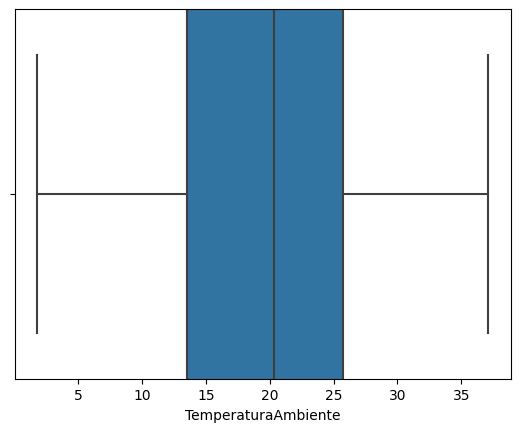

In [78]:
sns.boxplot(x = 'TemperaturaAmbiente', width = 1.5,fliersize=15 , data=ds)

In [79]:
#DataFframe sem outliers
#ds_clean.drop(ds_clean[ds_clean.VARIAVEL < 2].index, axis=0, inplace=True)

#Temperatura ambiente - range: 1.81°C - 37.11°C

ds_clean = ds

ds_clean.drop(ds_clean[ds_clean.TemperaturaAmbiente < 1.81].index, axis=0, inplace=True)
ds_clean.drop(ds_clean[ds_clean.TemperaturaAmbiente > 37.11].index, axis=0, inplace=True)

ds_clean['TemperaturaAmbiente'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 9568 entries, 0 to 9567
Series name: TemperaturaAmbiente
Non-Null Count  Dtype  
--------------  -----  
9568 non-null   float64
dtypes: float64(1)
memory usage: 74.9 KB


<Axes: xlabel='VacuodeExaustao'>

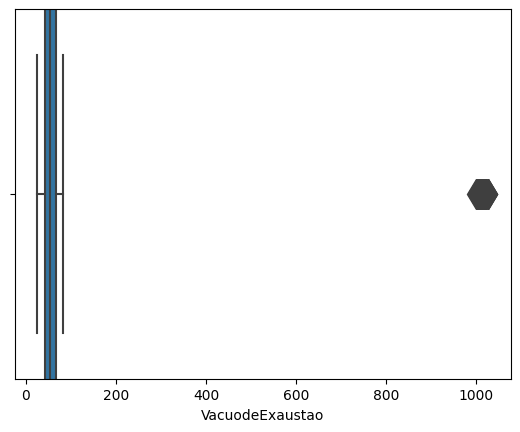

In [80]:
sns.boxplot(x = 'VacuodeExaustao', width = 1.5,fliersize=15 , data=ds)

In [81]:
#Vácuo de exaustão - range: 25.36 - 81.56 cmHg

ds_clean.drop(ds_clean[ds_clean.VacuodeExaustao < 25.36].index, axis=0, inplace=True)
ds_clean.drop(ds_clean[ds_clean.VacuodeExaustao > 81.56].index, axis=0, inplace=True)
ds_clean['VacuodeExaustao'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9474 entries, 0 to 9567
Series name: VacuodeExaustao
Non-Null Count  Dtype  
--------------  -----  
9474 non-null   float64
dtypes: float64(1)
memory usage: 148.0 KB


<Axes: xlabel='Pressaoatmosferica'>

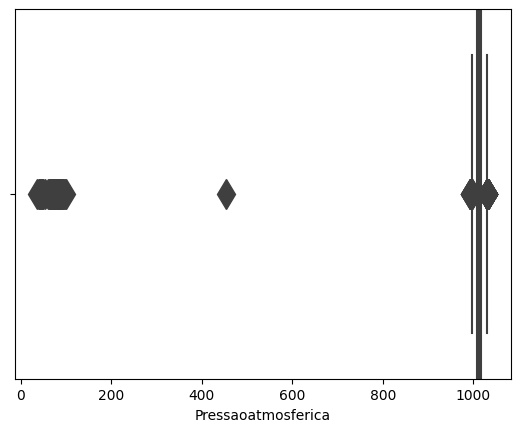

In [82]:
sns.boxplot(x = 'Pressaoatmosferica', width = 1.5,fliersize=15 , data=ds)

In [83]:
#Pressão ambiente - range: 992.89 - 1033.30 milibar
ds_clean.drop(ds_clean[ds_clean.Pressaoatmosferica < 992.89].index, axis=0, inplace=True)
ds_clean.drop(ds_clean[ds_clean.Pressaoatmosferica > 1033.30].index, axis=0, inplace=True)
ds_clean['Pressaoatmosferica'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9405 entries, 0 to 9567
Series name: Pressaoatmosferica
Non-Null Count  Dtype  
--------------  -----  
9405 non-null   float64
dtypes: float64(1)
memory usage: 147.0 KB


<Axes: xlabel='Umidaderelativa'>

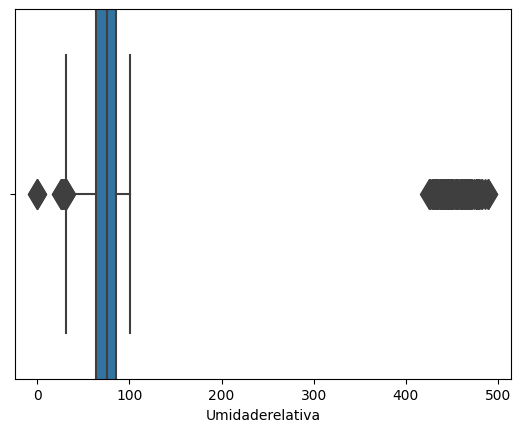

In [84]:
sns.boxplot(x = 'Umidaderelativa', width = 1.5,fliersize=15 , data=ds)	

In [85]:
#Umidade relativa - range: 25.56% - 100.16%
ds_clean.drop(ds_clean[ds_clean.Umidaderelativa < 25.56].index, axis=0, inplace=True)
#ds_clean.drop(ds_clean[ds_clean.Umidaderelativa > 100.16].index, axis=0, inplace=True)
ds_clean['Umidaderelativa'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9403 entries, 0 to 9567
Series name: Umidaderelativa
Non-Null Count  Dtype  
--------------  -----  
9403 non-null   float64
dtypes: float64(1)
memory usage: 146.9 KB


<Axes: xlabel='Produçaodeenergiaeletricaporhora'>

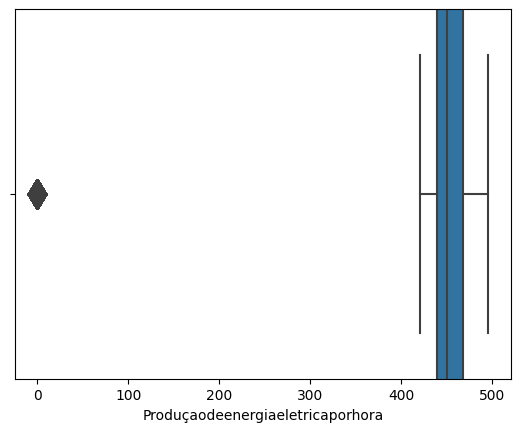

In [86]:
sns.boxplot(x = 'Produçaodeenergiaeletricaporhora', width = 1.5,fliersize=15 , data=ds)	

In [87]:
#Produção de energia elétrica por hora - range: 420.26 - 495.76 MW
ds_clean.drop(ds_clean[ds_clean.Produçaodeenergiaeletricaporhora < 420.26].index, axis=0, inplace=True)
#ds_clean.drop(ds_clean[ds_clean.Produçaodeenergiaeletricaporhora > 495.76].index, axis=0, inplace=True)
ds_clean['Produçaodeenergiaeletricaporhora'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9198 entries, 0 to 9567
Series name: Produçaodeenergiaeletricaporhora
Non-Null Count  Dtype  
--------------  -----  
9195 non-null   float64
dtypes: float64(1)
memory usage: 143.7 KB


In [88]:
ds_clean.info()
ds_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TemperaturaAmbiente               9198 non-null   float64
 1   VacuodeExaustao                   9198 non-null   float64
 2   Pressaoatmosferica                9198 non-null   float64
 3   Umidaderelativa                   9198 non-null   float64
 4   Produçaodeenergiaeletricaporhora  9195 non-null   float64
dtypes: float64(5)
memory usage: 431.2 KB


,TemperaturaAmbiente,VacuodeExaustao,Pressaoatmosferica,Umidaderelativa,Produçaodeenergiaeletricaporhora
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


#Correlação e escolha de parâmetros

<Axes: >

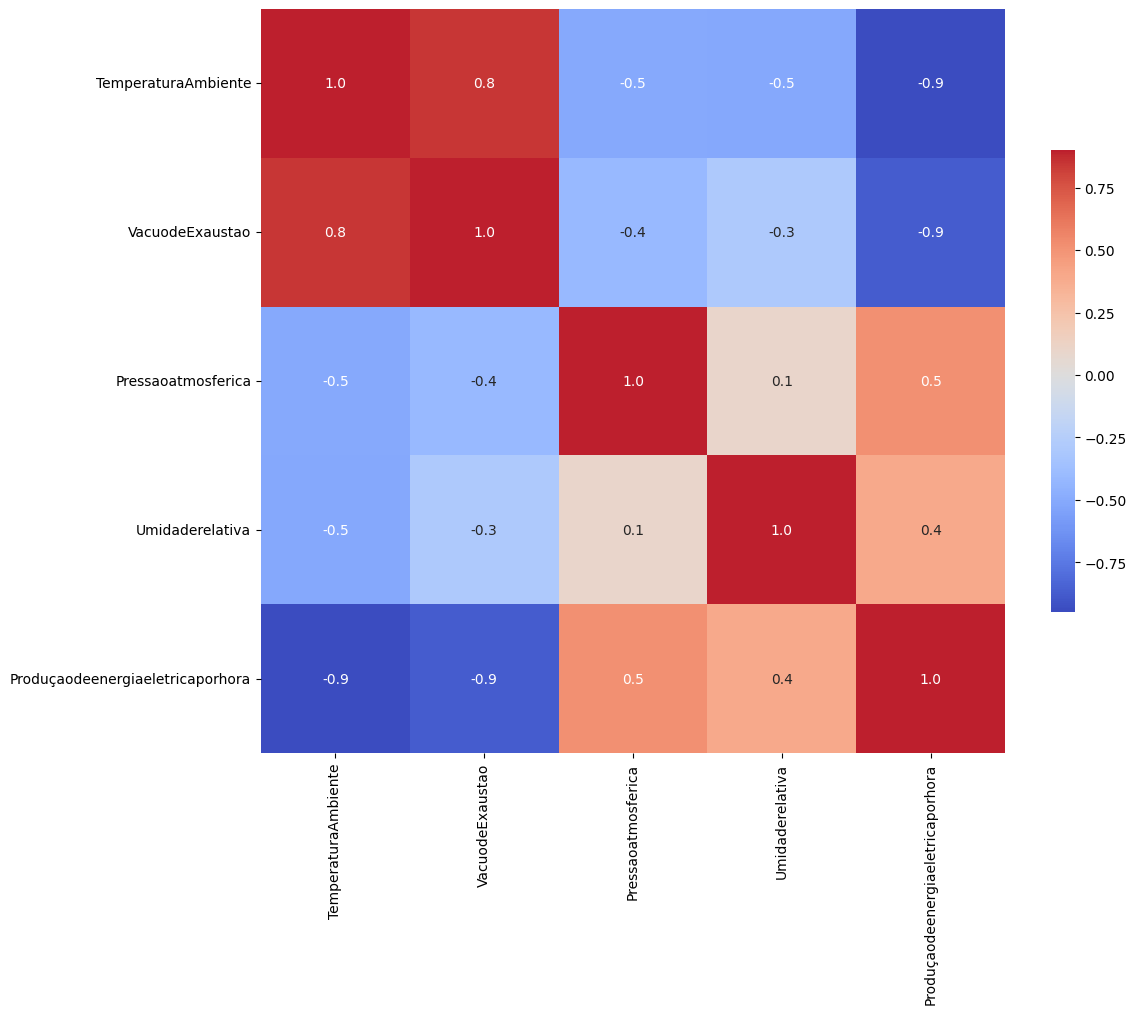

In [89]:
correlation = ds_clean.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', vmax=.9, center=0,
            square=True, linewidths=0, fmt= '.1f', cbar_kws={"shrink":.5})

#É possível observar que todas as variavéis tÊm correlação significativa com a produção de energia.

In [90]:
#A quantidade de missing data é quase irrelevante
(ds_clean.isnull().sum() / ds.shape[0]).sort_values(ascending=False)

Produçaodeenergiaeletricaporhora    0.000326
TemperaturaAmbiente                 0.000000
VacuodeExaustao                     0.000000
Pressaoatmosferica                  0.000000
Umidaderelativa                     0.000000
dtype: float64

In [91]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TemperaturaAmbiente               9198 non-null   float64
 1   VacuodeExaustao                   9198 non-null   float64
 2   Pressaoatmosferica                9198 non-null   float64
 3   Umidaderelativa                   9198 non-null   float64
 4   Produçaodeenergiaeletricaporhora  9195 non-null   float64
dtypes: float64(5)
memory usage: 431.2 KB


In [92]:
ds_final = ds_clean
ds_final.fillna({"TemperaturaAmbiente":ds_clean['TemperaturaAmbiente'].interpolate(method ='linear', limit_direction ='backward'),
                       "VacuodeExaustao":ds_final['VacuodeExaustao'].interpolate(method ='linear', limit_direction ='backward'),
                       "Pressaoatmosferica":ds_final['Pressaoatmosferica'].interpolate(method ='linear', limit_direction ='backward'),
                       "Umidaderelativa":ds_final['Umidaderelativa'].interpolate(method ='linear', limit_direction ='backward'),
                       "Produçaodeenergiaeletricaporhora":ds_final['Produçaodeenergiaeletricaporhora'].interpolate(method ='linear', limit_direction ='backward'),
              }, inplace=True)

ds_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TemperaturaAmbiente               9198 non-null   float64
 1   VacuodeExaustao                   9198 non-null   float64
 2   Pressaoatmosferica                9198 non-null   float64
 3   Umidaderelativa                   9198 non-null   float64
 4   Produçaodeenergiaeletricaporhora  9198 non-null   float64
dtypes: float64(5)
memory usage: 431.2 KB


#Regressão linear

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Escolha do modelo
model = LinearRegression()

#Denotação dos parâmetros
X = ds_final[['TemperaturaAmbiente', 'VacuodeExaustao', 'Pressaoatmosferica', 'Umidaderelativa']].values
y = ds_final[['Produçaodeenergiaeletricaporhora']].values

#Divisão do dataset em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

#Treinamento e teste do modelo
model.fit(X_treino, y_treino)
y_pred= model.predict(X_teste)

#Impressão dos coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

#Avaliação do desempenho do modelo e cálculo da média do R2
a = 0
n = 100
for i in range (n):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)
  model.fit(X_treino, y_treino)
  y_pred= model.predict(X_teste)
  a = a + r2_score(y_teste, y_pred)

r2_unico = r2_score(y_teste, y_pred)
mediar2= a/n
mae_regressao = mean_absolute_error(y_teste, y_pred)
mse_regressao = mean_squared_error(y_teste, y_pred)
#Impressão dos resultados
print("MAE:\t\t", mae_regressao)
print("MSE:\t\t", mse_regressao)
print("R2 Score único:\t", r2_unico)
print("R2 Score média:", mediar2, {n}, "interações \t")

Coeficiente:	 [[-1.92004687 -0.25197387  0.07080521 -0.13537347]]
Intercepto:	 [443.98274722]
MAE:		 3.647208105302398
MSE:		 20.992069976088047
R2 Score único:	 0.9269695344041959
R2 Score média: 0.9269950018858681 {100} interações 	


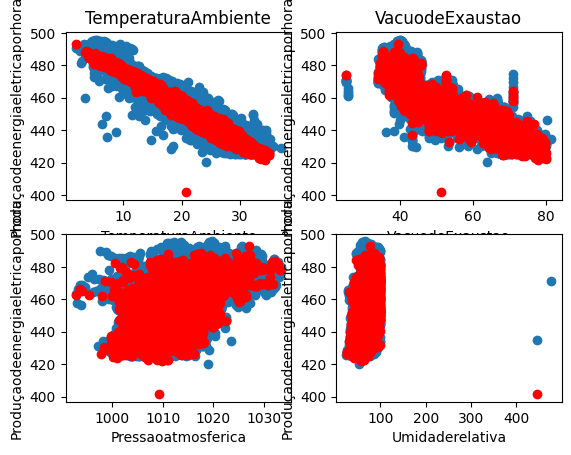

In [94]:
#Impressão dos gráficos dos valores preditos sobre os valores reais

fig, ax = plt.subplots(2, 2)
ax[0,0].set_title('TemperaturaAmbiente')
ax[0,0].scatter(X[:,0], y);
ax[0,0].scatter(X_teste[:,0], y_pred, color='red');
ax[0,0].set_xlabel('TemperaturaAmbiente');
ax[0,0].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[0,1].set_title('VacuodeExaustao')
ax[0,1].scatter(X[:,1], y);
ax[0,1].scatter(X_teste[:,1], y_pred, color='red');
ax[0,1].set_xlabel('VacuodeExaustao');
ax[0,1].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[1,0].scatter(X[:,2], y);
ax[1,0].scatter(X_teste[:,2], y_pred, color='red');
ax[1,0].set_xlabel('Pressaoatmosferica');
ax[1,0].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[1,1].scatter(X[:,3], y);
ax[1,1].scatter(X_teste[:,3], y_pred, color='red');
ax[1,1].set_xlabel('Umidaderelativa');
ax[1,1].set_ylabel('Produçaodeenergiaeletricaporhora');

#Regressão Lasso

In [95]:
#Importando bibliotecas
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Denotação dos parâmetros
X = ds_final[['TemperaturaAmbiente', 'VacuodeExaustao', 'Pressaoatmosferica', 'Umidaderelativa']].values
y = ds_final[['Produçaodeenergiaeletricaporhora']].values

#Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#Treinamento do modelo
modelo1 = Lasso(alpha = 0.5)
modelo1.fit(X_train, y_train)

#Impressão do score
score = modelo1.score(X_train, y_train)
print("R2 Score único teste:\t", score)

R2 Score único teste:	 0.9280029976339468


(1e-05, 10)

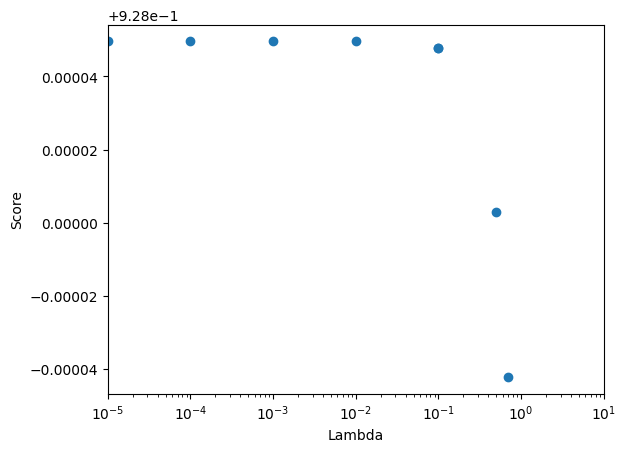

In [96]:
#Estimativa do melhor coeficiente lambda para o lasso
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.1]
scores = []

for i in range(len(lambdas)):
  modelo = Lasso(alpha=lambdas[i])
  modelo.fit(X_train, y_train)
  score = modelo.score(X_train, y_train)
  scores.append(score)

#Gráfico do desempenho de acordo com os valores escolhidos para lambda
plt.scatter(lambdas, scores);
plt.xlabel('Lambda');
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10])

In [97]:
#Teste do modelo com o lambda escolhido
modelo_final = Lasso(alpha=0.00001)
modelo_final.fit(X, y)
Y_pred = modelo_final.predict(X_test)

#Cálculo do resíduo r2
r2unico = r2_score(y_test, Y_pred)

#Média do r2
b = 0
m = 100
for i in range (m):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
  modeloloop = Lasso(alpha = 0.5)
  modeloloop.fit(X_train, y_train)
  modelo_final_loop = Lasso(alpha=0.00001)
  modelo_final_loop.fit(X, y)
  Y_pred_loop = modelo_final_loop.predict(X_test)
  b = b + r2_score(y_test, Y_pred_loop)
media = b/m

#Impressão dos coeficientes
print("Coeficiente:\t", modelo_final.coef_)
print("Intercepto:\t", modelo_final.intercept_)

#Avaliação do desempenho do modelo
print("MAE:\t\t", mean_absolute_error(y_test, Y_pred))
print("MSE:\t\t", mean_squared_error(y_test, Y_pred))
print("R2 Score único:\t", r2unico)
print("R2 Score loop:\t", media, {m}, "interações \t")

Coeficiente:	 [-1.92216893 -0.25083697  0.07368153 -0.13298391]
Intercepto:	 [440.86135936]
MAE:		 19.16891826651043
MSE:		 554.3326961139296
R2 Score único:	 0.9271640979796166
R2 Score loop:	 0.9271320254156694 {100} interações 	


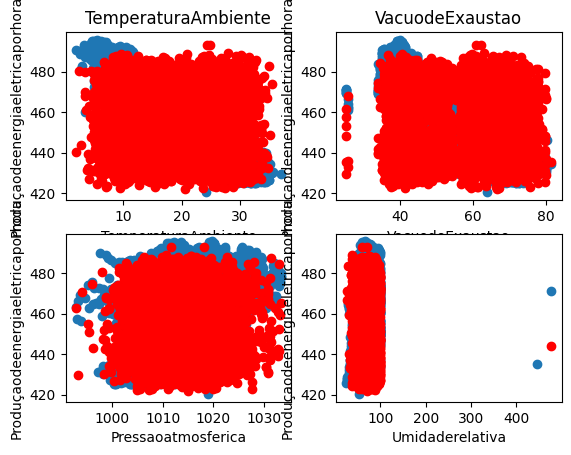

In [98]:
#Impressão dos gráficos dos valores preditos sobre os valores reais

fig, ax = plt.subplots(2, 2)

ax[0,0].set_title('TemperaturaAmbiente')
ax[0,0].scatter(X[:,0], y);
ax[0,0].scatter(X_test[:,0], Y_pred, color='red');
ax[0,0].set_xlabel('TemperaturaAmbiente');
ax[0,0].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[0,1].set_title('VacuodeExaustao')
ax[0,1].scatter(X[:,1], y);
ax[0,1].scatter(X_test[:,1], Y_pred, color='red');
ax[0,1].set_xlabel('VacuodeExaustao');
ax[0,1].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[1,0].scatter(X[:,2], y);
ax[1,0].scatter(X_test[:,2], Y_pred, color='red');
ax[1,0].set_xlabel('Pressaoatmosferica');
ax[1,0].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[1,1].scatter(X[:,3], y);
ax[1,1].scatter(X_test[:,3], Y_pred, color='red');
ax[1,1].set_xlabel('Umidaderelativa');
ax[1,1].set_ylabel('Produçaodeenergiaeletricaporhora');

#Ridge Regresssion

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Denotação dos parâmetros
X = ds_final[['TemperaturaAmbiente', 'VacuodeExaustao', 'Pressaoatmosferica', 'Umidaderelativa']].values
y = ds_final[['Produçaodeenergiaeletricaporhora']].values


#Divisão do dataset em treino e teste
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.5)

ridgeRegresssor = Ridge(alpha=0.00001)

ridgeRegresssor.fit(X_training,y_training)

Y_predito = ridgeRegresssor.predict(X_testing)

r2unico = r2_score(Y_predito, y_testing)

print("R2 Score único teste:\t", r2unico)

R2 Score único teste:	 0.9230995837484721


In [100]:
#Média do r2
b = 0
m = 100
for i in range (m):
  X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.5)
  modeloloop = Ridge(alpha = 0.5)
  modeloloop.fit(X_training, y_training)
  modelo_final_loop = Ridge(alpha=0.00001)
  modelo_final_loop.fit(X, y)
  Y_pred_loop = modelo_final_loop.predict(X_testing)
  b = b + r2_score(y_testing, Y_pred_loop)
media = b/m

#Impressão dos coeficientes
print("Coeficiente:\t", modelo_final.coef_)
print("Intercepto:\t", modelo_final.intercept_)

#Avaliação do desempenho do modelo
print("MAE:\t\t", mean_absolute_error(y_testing, Y_predito))
print("MSE:\t\t", mean_squared_error(y_testing, Y_predito))
print("R2 Score único:\t", r2unico)
print("R2 Score loop:\t", media, {m}, "interações \t")

Coeficiente:	 [-1.92216893 -0.25083697  0.07368153 -0.13298391]
Intercepto:	 [440.86135936]
MAE:		 19.176125646661976
MSE:		 560.410138002612
R2 Score único:	 0.9230995837484721
R2 Score loop:	 0.9271950759720863 {100} interações 	


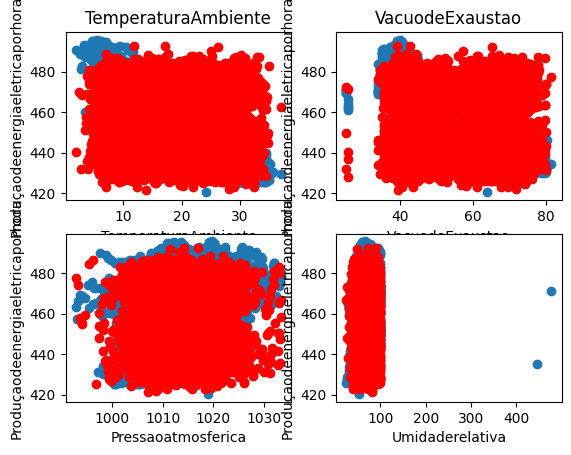

In [101]:
#Impressão dos gráficos dos valores preditos sobre os valores reais

fig, ax = plt.subplots(2, 2)

ax[0,0].set_title('TemperaturaAmbiente')
ax[0,0].scatter(X[:,0], y);
ax[0,0].scatter(X_testing[:,0], Y_predito, color='red');
ax[0,0].set_xlabel('TemperaturaAmbiente');
ax[0,0].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[0,1].set_title('VacuodeExaustao')
ax[0,1].scatter(X[:,1], y);
ax[0,1].scatter(X_testing[:,1], Y_predito, color='red');
ax[0,1].set_xlabel('VacuodeExaustao');
ax[0,1].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[1,0].scatter(X[:,2], y);
ax[1,0].scatter(X_testing[:,2], Y_predito, color='red');
ax[1,0].set_xlabel('Pressaoatmosferica');
ax[1,0].set_ylabel('Produçaodeenergiaeletricaporhora');

ax[1,1].scatter(X[:,3], y);
ax[1,1].scatter(X_testing[:,3], Y_predito, color='red');
ax[1,1].set_xlabel('Umidaderelativa');
ax[1,1].set_ylabel('Produçaodeenergiaeletricaporhora');

Renê Gibran e Silva Nery:
# - Obrigado!